In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
data=pd.read_csv('customer_data.csv')
pdata=pd.read_csv('payment_data.csv')

In [2]:
data.head(5)

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [3]:
pdata.head(5)

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
label     1125 non-null int64
id        1125 non-null int64
fea_1     1125 non-null int64
fea_2     976 non-null float64
fea_3     1125 non-null int64
fea_4     1125 non-null float64
fea_5     1125 non-null int64
fea_6     1125 non-null int64
fea_7     1125 non-null int64
fea_8     1125 non-null int64
fea_9     1125 non-null int64
fea_10    1125 non-null int64
fea_11    1125 non-null float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [5]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
id                 8250 non-null int64
OVD_t1             8250 non-null int64
OVD_t2             8250 non-null int64
OVD_t3             8250 non-null int64
OVD_sum            8250 non-null int64
pay_normal         8250 non-null int64
prod_code          8250 non-null int64
prod_limit         2132 non-null float64
update_date        8224 non-null object
new_balance        8250 non-null float64
highest_balance    7841 non-null float64
report_date        7136 non-null object
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB


In [6]:
data['fea_2']

0       1245.5
1       1277.0
2       1298.0
3       1335.5
4          NaN
         ...  
1120    1289.0
1121       NaN
1122    1220.0
1123    1250.0
1124    1415.0
Name: fea_2, Length: 1125, dtype: float64

In [7]:
data.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [8]:
data['fea_2']=data['fea_2'].fillna(data['fea_2'].mean())

In [9]:
data['fea_2']

0       1245.500000
1       1277.000000
2       1298.000000
3       1335.500000
4       1283.911373
           ...     
1120    1289.000000
1121    1283.911373
1122    1220.000000
1123    1250.000000
1124    1415.000000
Name: fea_2, Length: 1125, dtype: float64

In [10]:
data.isnull().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

Missing values have been eliminated using mean of the rest of the data to fill the missing values.

In [11]:
data['label'].value_counts()

0    900
1    225
Name: label, dtype: int64

## 0 stands for low credit risk customers and 1 stands for high credit risk customers

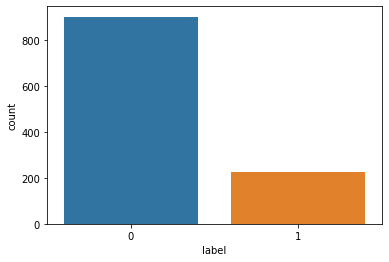

In [12]:
sns.countplot(data['label'],data=data)

In [13]:
data=data.drop(['id'],axis=1)
x= data.drop(['label'],axis=1)
y=data['label']

In [14]:
x.head(100)

,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,5,1245.500000,3,77000.0,2,15,5,109,5,151300,244.948974
1,4,1277.000000,1,113000.0,2,8,-1,100,3,341759,207.173840
2,7,1298.000000,1,110000.0,2,11,-1,101,5,72001,1.000000
3,7,1335.500000,1,151000.0,2,11,5,110,3,60084,1.000000
4,7,1283.911373,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...
95,4,1386.500000,3,296000.0,2,9,5,109,5,151300,223.606798
96,7,1283.911373,3,35000.0,2,12,-1,86,3,650070,161.854873
97,4,1257.500000,1,91000.0,2,8,5,90,3,72000,1.000000
98,4,1269.500000,3,107000.0,1,8,9,81,3,60040,173.205081


In [15]:
y.head(6)

0    1
1    0
2    0
3    1
4    0
5    0
Name: label, dtype: int64

In [16]:
x.shape

(1125, 11)

In [17]:
y.shape

(1125,)

Oversampling the data

In [18]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
x_train_rand,y_train_rand=os.fit_resample(x,y)

In [19]:
x_train_rand.shape

(1800, 11)

In [20]:
y_train_rand.shape

(1800,)

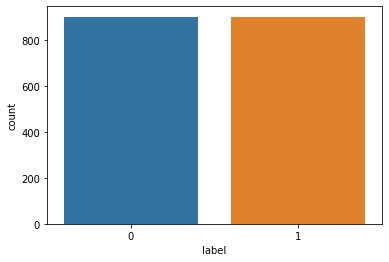

In [21]:
sns.countplot(y_train_rand,data=data)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_train_rand,y_train_rand, test_size=0.30, random_state=1)

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))
print('\n')
print(accuracy_score(y_test, rfc_pred))


[[242  24]
 [ 10 264]]


              precision    recall  f1-score   support

           0       0.96      0.91      0.93       266
           1       0.92      0.96      0.94       274

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540



0.937037037037037


# Random forest Classifier predicts the Credit risk of customers at 93.7% accuracy